In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('bmh')

In [3]:
df=pd.read_csv("train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<h1> DATA DESCRIPTION </h1>
<ol>
    <li> Survival: Survival (0 = No; 1 = Yes)</li>
    <li>pclass: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)</li>
    <li>name: Name</li>
    <li>sex: Sex</li>
    <li>age: Age</li>
    <li>sibsp: Number of Siblings/Spouses Aboard</li>
    <li>parch: Number of Parents/Children Aboard</li>
    <li>ticket: Ticket Number</li>
    <li>fare: Passenger Fare</li>
    <li>cabin: Cabin</li>
    <li>embarked: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)</li>   
</ol>

<h1>VARIABLE NOTES</h1>
<ol>
    <li>pclass: A proxy for socio-economic status (SES) 1st = Upper 2nd = Middle 3rd = Lower</li>
    <li>age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5</li>
    <li>sibsp: The dataset defines family relations in this way… Sibling = brother, sister, stepbrother, stepsister Spouse         = husband, wife (mistresses and fiancés were ignored)</li>
    <li>parch: The dataset defines family relations in this way… Parent = mother, father Child = daughter, son,                     stepdaughter, stepson Some children travelled only with a nanny, therefore parch=0 for them.</li>
    <li>Now let’s see some statistical summary of the imported dataset using pandas.describe() method.</li>
</ol>

In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
train = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [13]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

<h1>Data exploration:</h1>
I will be exploring the following questions on the dataframe
<ol>
    <li>How Survival is correlated to other attributes of the dataset ? Findout Pearson’s r.</li>
    <li>Did Sex play a role in Survival ?</li>
    <li>Did class played role in survival ?</li>
    <li>How fare is related to Age, Class and Port of Embarkation ?</li>
    <li>How Embarkation varied across different ports ?</li>
</ol>

<h1>Q1;How Survival is correlated to other attributes of the dataset ? Findout Pearson’s r.</h1>

In [17]:
#How Survival is correlated to other attributes of the dataset ? Findout Pearson’s r
train.corr(method='pearson')


,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<h2><p>From above correlation table we can see that Survival is inversly correlated to Pclass value. In our case since Class 1 has lower numerical value, it had better survival rate compared to other classes.
We also see that Age and Survival are slighltly correlated.</h2>

<h1>Did Sex play a role in Survival ?</h1>

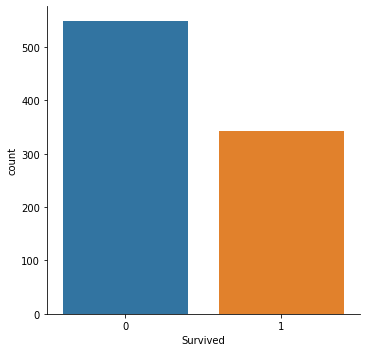

In [63]:
#train.groupby(['Survived']).hist()

sns.factorplot('Survived', data=df, kind='count')

Text(0.5, 1.0, 'Agewise distribution of the passenger aboard')

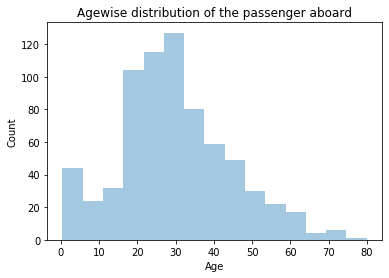

In [57]:
#agewise distribution of the passenger
#Histogram of Age of the given data set(sample)
#plt.hist(train['Age'].dropna())
sns.distplot(train['Age'].dropna(), bins=15, kde=False)
plt.ylabel('Count')
plt.title('Agewise distribution of the passenger')


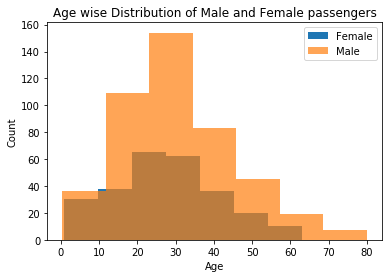

In [31]:
#Age wise Distribution of Male and Female passengers
plt.hist(train['Age'][(train['Sex'] == 'female')].dropna(), bins=7, label='Female', histtype='stepfilled')
plt.hist(train['Age'][(train['Sex'] == 'male')].dropna(), bins=7, label='Male', alpha=.7, histtype='stepfilled')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age wise Distribution of Male and Female passengers')
plt.legend()


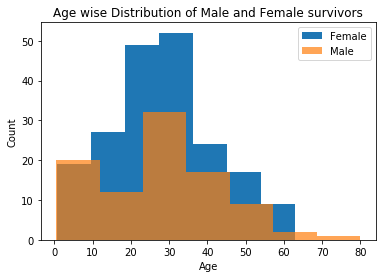

In [34]:
#passenges who Survived across both Genders 
#Age wise Distribution of Male and Female survivors
plt.hist(train['Age'][(train['Sex'] == 'female') & (train['Survived'] == 1)].dropna(), bins=7, label='Female', histtype='stepfilled')
plt.hist(train['Age'][(train['Sex'] == 'male') & (train['Survived'] == 1)].dropna(), bins=7, label='Male', alpha=.7, histtype='stepfilled')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age wise Distribution of Male and Female survivors')
plt.legend()

In [40]:
#From above visualization, it is evident that Women had better survival chance. One can do an Hypothesis test to verify this.
#Lets take a look for youngest and oldest passenger to survive.
yougest_survive = train['Age'][(train['Survived'] == 1)].min()
youngest_die = train['Age'][(train['Survived'] == 0)].min()
oldest_survive = train['Age'][(train['Survived'] == 1)].max()
oldest_die = train['Age'][(train['Survived'] == 0)].max()

print ("Yougest to survive: {} \nYoungest to die: {} \nOldest to survive: {} \nOldest to die: {}".format(yougest_survive, youngest_die, oldest_survive, oldest_die))


Yougest to survive: 0.42 
Youngest to die: 1.0 
Oldest to survive: 80.0 
Oldest to die: 74.0


<h1>Q3;Did class played role in survival ?</h1>

In [42]:
#sns.plt.hist(train.groupby(['Pclass', 'Survived', 'Sex']).size())
grouped_by_pclass = train.groupby(['Pclass', 'Survived', 'Sex'])
grouped_by_pclass.size()


Pclass  Survived  Sex   
1       0         female      3
                  male       77
        1         female     91
                  male       45
2       0         female      6
                  male       91
        1         female     70
                  male       17
3       0         female     72
                  male      300
        1         female     72
                  male       47
dtype: int64

In [43]:
train.groupby(['Pclass', 'Sex']).describe()

Survived                                                 Age  \
                 count      mean       std  min  25%  50%  75%  max  count   
Pclass Sex                                                                   
1      female     94.0  0.968085  0.176716  0.0  1.0  1.0  1.0  1.0   85.0   
       male      122.0  0.368852  0.484484  0.0  0.0  0.0  1.0  1.0  101.0   
2      female     76.0  0.921053  0.271448  0.0  1.0  1.0  1.0  1.0   74.0   
       male      108.0  0.157407  0.365882  0.0  0.0  0.0  0.0  1.0   99.0   
3      female    144.0  0.500000  0.501745  0.0  0.0  0.5  1.0  1.0  102.0   
       male      347.0  0.135447  0.342694  0.0  0.0  0.0  0.0  1.0  253.0   

                          ... Parch        Fare                         \
                    mean  ...   75%  max  count        mean        std   
Pclass Sex                ...                                            
1      female  34.611765  ...   1.0  2.0   94.0  106.125798  74.259988   
       male    41.281386  ...   0.0  4.0  122.0   67.226127  77.548021   
2      female  28.722973  ...   1.0  3.0   76.0   21.970121  10.891796   
       male    30.740707  ...   0.0  2.0  108.0   19.741782  14.922235   
3      female  21.750000  ...   1.0  6.0  144.0   16.118810  11.690314   
       male    26.507589  ...   0.0  5.0  347.0   12.661633  11.681696   

                                                                  
                   min       25%       50%         75%       max  
Pclass Sex                                                        
1      female  25.9292  57.24480  82.66455  134.500000  512.3292  
       male     0.0000  27.72810  41.26250   78.459375  512.3292  
2      female  10.5000  13.00000  22.00000   26.062500   65.0000  
       male     0.0000  12.33125  13.00000   26.000000   73.5000  
3      female   6.7500   7.85420  12.47500   20.221875   69.5500  
       male     0.0000   7.75000   7.92500   10.008300   69.5500  

[6 rows x 40 columns]

Text(0.5, 0.98, 'Class wise segregation of passengers')

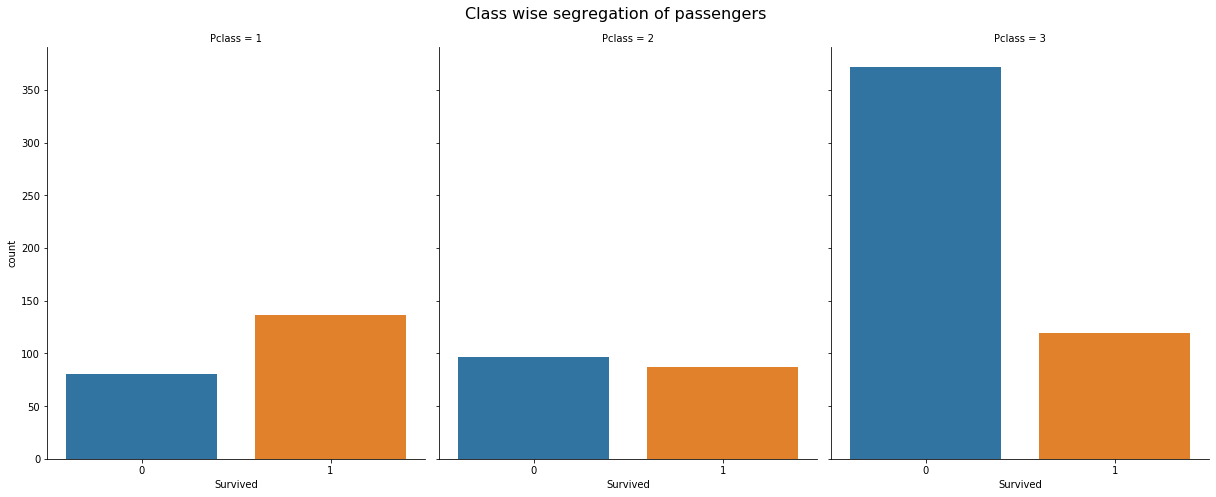

In [49]:
sns.catplot('Survived', col='Pclass', data=train, kind='count', height=7, aspect=.8)
plt.subplots_adjust(top=0.9)
plt.suptitle('Class wise segregation of passengers', fontsize=16)

<h1>Q4; How fare is related to Age, Class and Port of Embarkation? </h1>
<h1>Q5; How Embarkation varied across different ports? </h1>

Text(0.5, 1, 'Scatterplot of passengers w.r.t Fare and Age')

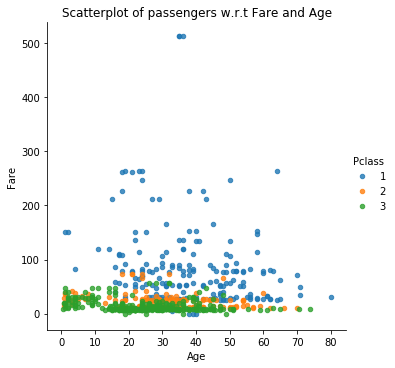

In [53]:
sns.lmplot('Age', 'Fare', data=train, fit_reg=False, hue="Pclass", scatter_kws={"marker": ".", "s": 20})
plt.title('Scatterplot of passengers w.r.t Fare and Age')

Text(0.5, 0.98, 'Scatterplot of passengers w.r.t Fare and Age for diff. ports')

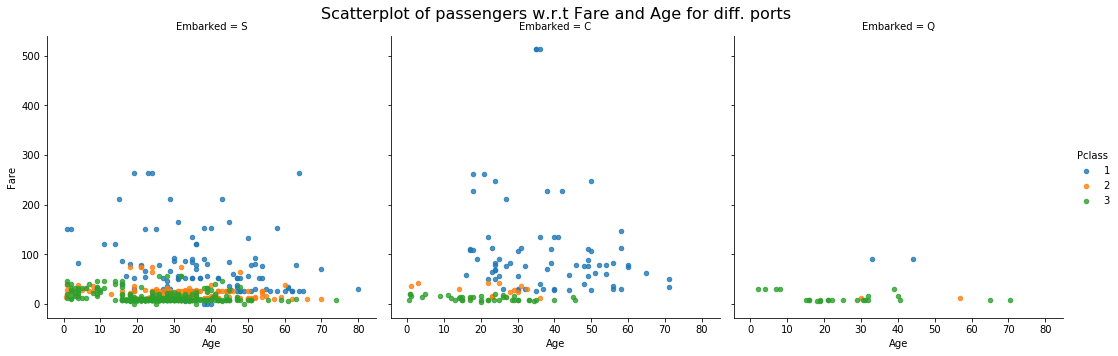

In [56]:
sns.lmplot('Age', 'Fare', data=train, fit_reg=False, hue="Pclass", col="Embarked", scatter_kws={"marker": ".", "s": 20})
plt.subplots_adjust(top=0.9)
plt.suptitle('Scatterplot of passengers w.r.t Fare and Age for diff. ports', fontsize=16)

<h1>IN CONCLUSION</h1>
<h2><p>From my exploratory analysis of the train dataset, we can conclude that Females younger than 40 had a high chance of survival and females older than 40 have a minimal chance of survival.I also see that Class(Socio-Economic status) of the passengers had played a role in their survival. There were some limitation for this dataset such as missing values for some attributes of passesngers.</h2>